In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.stats
from scipy.stats import norm
from scipy.linalg import cholesky

#Fix seed for reproducibility
np.random.seed(0)

## Task 1

### Task 1.A

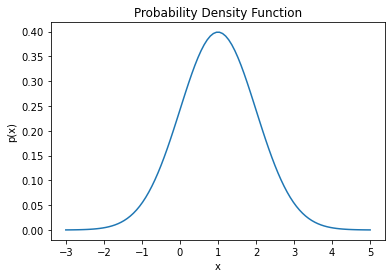

In [2]:
mu = 1
var = 1
sigma = np.sqrt(var)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
prior = norm.pdf(x, mu, sigma)

fig, ax = plt.subplots(1, 1)
ax.plot(x, prior)
ax.set_xlabel('x')
ax.set_ylabel('p(x)')
ax.set_title('Probability Density Function')
plt.show()

### Task 1.B

In [3]:
p_less_0 = norm.cdf(0, loc=1, scale=1)
print('Pr(X≤0)={:.6f}'.format(p_less_0))

Pr(X≤0)=0.158655


### Task 1.C

In [4]:
var_z = 0.2
sigma_z = np.sqrt(var_z)
z = 0.75
likelihood_fn = norm.pdf(z, x, sigma_z)
#posterior = likelihood_fn * prior
posterior = likelihood_fn * norm.pdf(x, mu, sigma_z) / norm.pdf(z, mu, sigma_z)

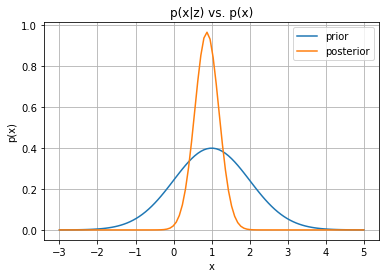

In [5]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, prior, label='prior')
ax.plot(x, posterior, label='posterior')
ax.set_xlabel('x')
ax.set_ylabel('p(x)')
ax.set_title('p(x|z) vs. p(x)')
plt.legend()
plt.grid()
plt.show()

[http://web.stanford.edu/class/stats200/Lecture20.pdf](http://web.stanford.edu/class/stats200/Lecture20.pdf)

### Task 1.D

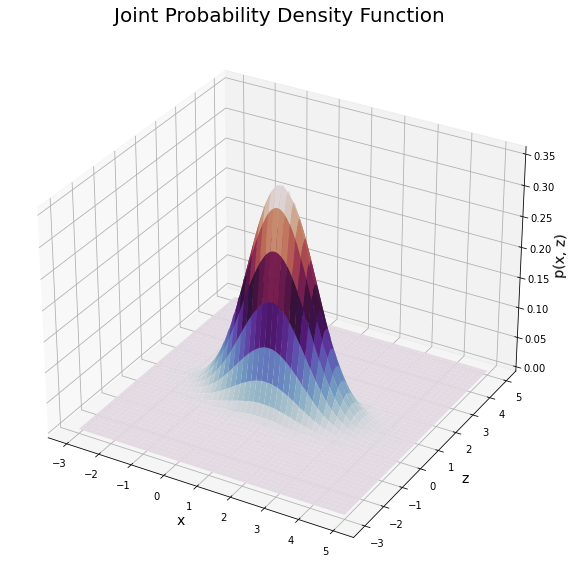

In [6]:
joint = np.outer(likelihood_fn, prior)
x_axis, y_axis = np.meshgrid(x, x)

ax = plt.figure(figsize=(10, 10)).gca(projection='3d')
ax.plot_surface(x_axis, y_axis, joint, cmap=cm.twilight)
ax.set_title('Joint Probability Density Function', fontsize=20)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('z', fontsize=14)
ax.set_zlabel('p(x, z)', fontsize=14)

plt.show()

## Task 2

### Task 2.A

In [7]:
def plot2dcov(mean, cov, k=1, num_points=50, ax=None, label=None):
    '''
    This function is supposed to plot k-sigma iso-contour for multivariate gaussian distribution.
    Parameters:
    mean: 1D array of means
    cov: 2D array of covariance
    k: the level of iso-contour to be plotted
    num_points: The number of points sampled to use for the plot
    ax: The canvas to plot on
    label: used to distinguish plots from each others if drawn on the same plot
    '''
    #Cholesky Decomposition
    L = cholesky(a=cov, lower=True, overwrite_a=False, check_finite=True)
    
    #Data Generation
    points = np.linspace(start=-np.pi, stop=np.pi, num=num_points, endpoint=True)
    points_coords = np.array([np.cos(points), np.sin(points)])
    
    #Transformation
    y = mean + k*np.dot(L, points_coords).T
    
    #Plotting
    if ax is not None:
        ax.set_aspect('equal')
        ax.plot(y[:, 0], y[:, 1], label=label if label is not None else '{}-$\sigma$'.format(k))

In [8]:
ks = [1, 2, 3]
mus = np.array([[0, 0], [5, 0], [2, 2]])
covs = np.array([[[1, 0], [0, 2]],
                [[3, -0.4], [-0.4, 2]],
                [[9.1, 6], [6, 4]]])

In [9]:
def main_plot(mu, cov):
    fig, ax = plt.subplots(figsize=(10, 10))
    for k in ks:
        plot2dcov(mu, cov, k=k, ax=ax)
    
    plt.xlabel('X', fontsize=14, fontweight='bold')
    plt.ylabel('Y', fontsize=14, fontweight='bold')
    plt.title('iso-contours of Multivariate Gaussian Distribution', fontsize=20)
    plt.legend()
    plt.grid()

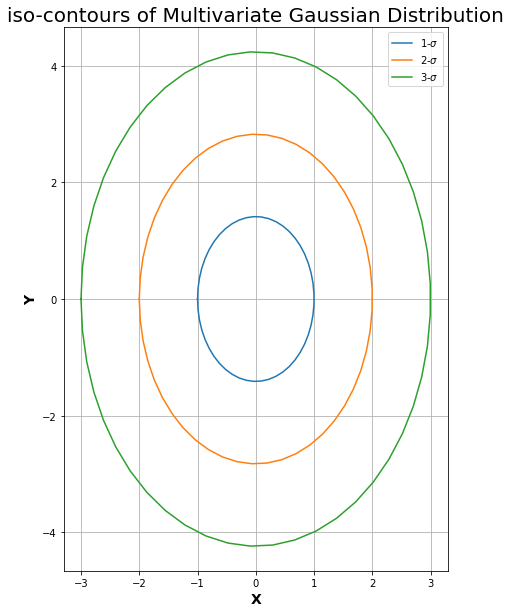

In [10]:
main_plot(mus[0], covs[0])

**Comment**: The plot is a originally-centered ($0$, $0$) straight ellipse due to uncorrelation between the two variables as both $\sigma_{xy}=\sigma_{yx}=0$. Also, it shows some stretching over the $y$-axis because its random veriable has more _auto-covariance_ than that of the $x$-axis.

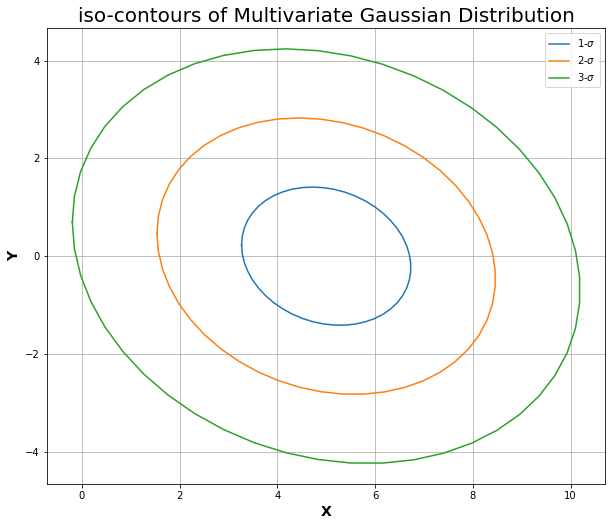

In [11]:
main_plot(mus[1], covs[1])

**Comment**: It's slightly visible that the ellipse is deviated to the left as the random variables are inversely correlated because of the negative value of their covariance. Unlike the previous plot, it has more stretching over the x-axis because of the opposite reason, but it's still shown to be a nearly circle because both _auto-covariances_ are quite close.

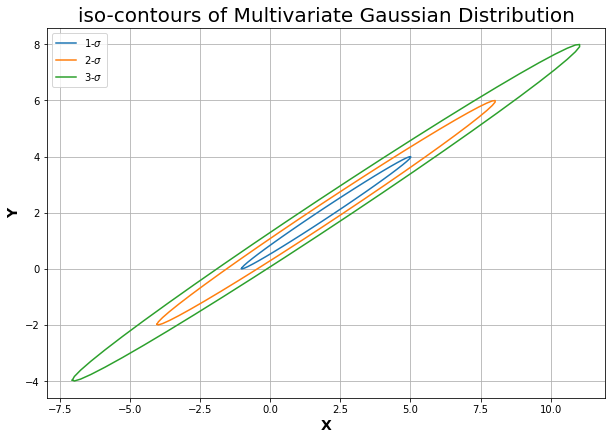

In [12]:
main_plot(mus[2], covs[2])

**Comment**: It's strongly visible that the plot is skewed to the right as the random variables are positively correlated because of the high positive value of their covariance. In addition to that, it shows a drastic stretching all along the $x$-axis because of $X$'s great _auto-covariance_, compared to $Y$'s one.

### Task 2.B

Please, refer to `PDF` file for more expansion about multiple variables.

Reference: [https://en.wikipedia.org/wiki/Sample_mean_and_covariance](https://en.wikipedia.org/wiki/Sample_mean_and_covariance)

Sample Mean: $\bar{x} = \frac{1}{n}\sum_{i=1}^{n}x_i$

Sample Covariance: $\bar{\sum_x} = \frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{x})^2 = \frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{x}).(x_i - \bar{x})^T = \frac{1}{n-1}\big[\sum_{i=1}^{n}x_i^2 - n\bar{x}^2\big]$

### Task 2.C

In [13]:
def sample_mean(points):
    return np.mean(points, axis=1)

def sample_covariance(points):
    return np.cov(points)

In [14]:
#check
points = np.array([[1, 2], [2, 4]])
print("sample mean =", sample_mean(points))
print("sample covariance \u03A3 =", sample_covariance(points))

sample mean = [1.5 3. ]
sample covariance Σ = [[0.5 1. ]
 [1.  2. ]]


Random samples are drawn from multivariate normal distribution using NumPy function: [https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html)

In [15]:
mean = np.array([2, 2])
cov = np.array([[1, 1.3], [1.3, 3]])

In [16]:
#Data Generation Example
x, y = np.random.multivariate_normal(mean=mean, cov=cov, size=200).T
mean_sm, cov_sm = sample_mean([x, y]), sample_covariance([x, y])
print("sample mean =", mean_sm)
print("sample covariance \u03A3 =", cov_sm)

sample mean = [2.05267182 2.12722248]
sample covariance Σ = [[0.94780134 1.27053939]
 [1.27053939 3.02608091]]


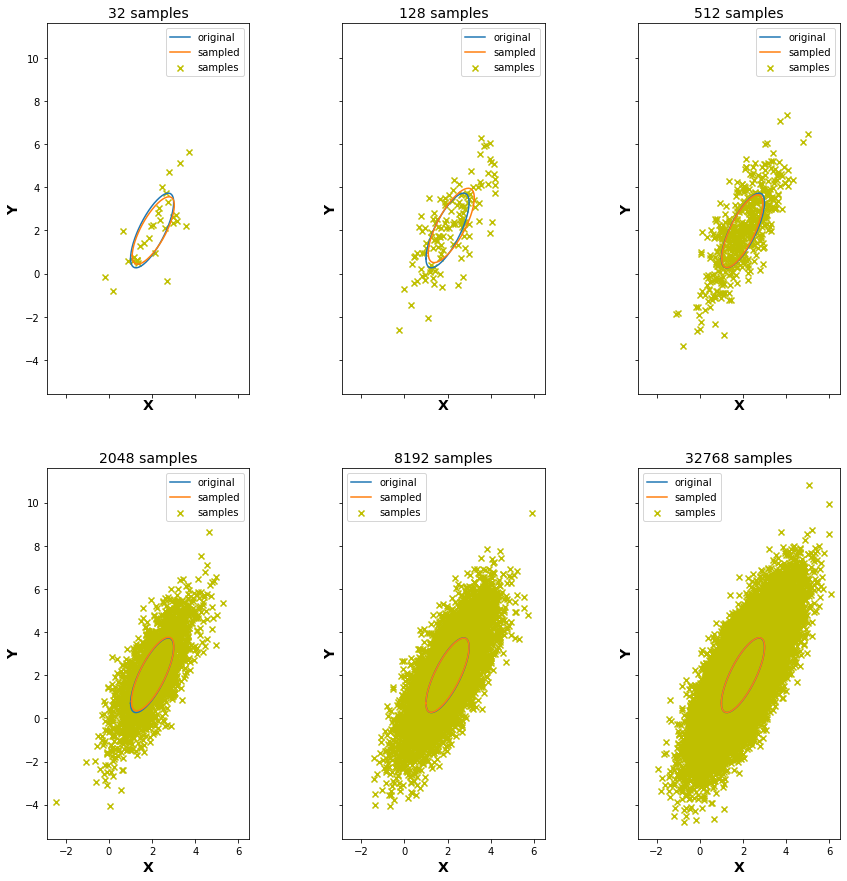

In [17]:
sizes = [int(i) for i in np.logspace(start=5, stop=15, num=6, base=2.0)]
sample_means, sample_covariances = np.empty((0, 2)), {}
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 15), sharex=True, sharey=True)

for i in range(len(sizes)):
    ax_ = ax[i//3, i%3]
    
    #Plot Original Distribution
    plot2dcov(mean, cov, k=1, ax=ax_, label='original')
    
    #Data Generation
    x, y = np.random.multivariate_normal(mean=mean, cov=cov, size=sizes[i]).T
    ax_.scatter(x, y, marker='x', label='samples', color='y')
    mean_sm, cov_sm = sample_mean([x, y]), sample_covariance([x, y])
    sample_means = np.vstack([sample_means, mean_sm])
    sample_covariances[i] = cov_sm
    
    #Plot Sampled Distribution
    plot2dcov(mean_sm, cov_sm, k=1, ax=ax_, label='sampled')

    ax_.set_xlabel('X', fontsize=14, fontweight='bold')
    ax_.set_ylabel('Y', fontsize=14, fontweight='bold')
    ax_.set_title('{} samples'.format(sizes[i]), fontsize=14)
    ax_.legend()

In [18]:
for i in range(len(sizes)):
    print('Using {} random points'.format(sizes[i]))
    print('\t-Sample Mean Vector: ', sample_means[i])
    print('\t-Sample Covariance Matrix: ', sample_covariances[i])
    print()

Using 32 random points
	-Sample Mean Vector:  [2.05267987 1.99937333]
	-Sample Covariance Matrix:  [[0.95245262 1.14060234]
 [1.14060234 2.44388688]]

Using 128 random points
	-Sample Mean Vector:  [2.17314427 2.23362486]
	-Sample Covariance Matrix:  [[1.14121627 1.36437898]
 [1.36437898 2.97317949]]

Using 512 random points
	-Sample Mean Vector:  [1.96857973 1.96828361]
	-Sample Covariance Matrix:  [[0.91007131 1.21107215]
 [1.21107215 2.860707  ]]

Using 2048 random points
	-Sample Mean Vector:  [2.02499658 2.0552609 ]
	-Sample Covariance Matrix:  [[0.96416464 1.24606481]
 [1.24606481 2.90655065]]

Using 8192 random points
	-Sample Mean Vector:  [1.99574025 2.001029  ]
	-Sample Covariance Matrix:  [[1.001522   1.30539411]
 [1.30539411 2.96665139]]

Using 32768 random points
	-Sample Mean Vector:  [2.00205438 2.00676136]
	-Sample Covariance Matrix:  [[1.00493217 1.30765886]
 [1.30765886 3.0026921 ]]



**comment**: Approximating the original distribution with estimated parameters maybe useful in case of not knowing the original ones, especially that the above results show that the two distributions are going **closer** by **increasing** the number of random samples.

Another comment deserves to be noted is that a reasonable number of samples is enough withing an acceptable tolerance to be drawn because a huge number of samples doesn't give the approximation a significant improvement. For example, the results of $512$ points are somewhat close to the results of $2048$ points, which is $4$ times its size.

## Task 3

### Task 3.A
Please, refer to `PDF` file for more details of the derivation.

$A = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}, B = \Delta_t\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}, R = \Sigma_{\eta_t}$

$\mu_t = A\mu_{t-1} + Bu_t$

$\Sigma_t = A\Sigma_{t-1}A^T + R$

### Task 3.B

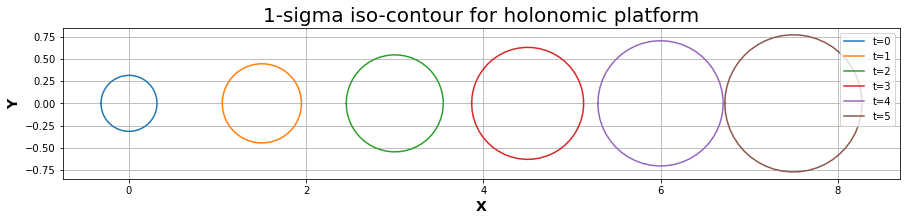

In [19]:
dt = 0.5
t = 5
I = np.array([[1, 0], [0, 1]])
A = I
B = dt * I
R = 0.1 * I
u = np.array([3, 0])
mu = np.array([0, 0])
cov = 0.1 * I


fig, ax = plt.subplots(figsize=(15, 15))
for i in range(0, t+1):
    
    plot2dcov(mu, cov, num_points=50, ax=ax, label='t={}'.format(i))

    mu = np.dot(A, mu) + np.dot(B, u)
    cov = np.dot(np.dot(A, cov), A.T) + R

ax.set_xlabel('X', fontsize=14, fontweight='bold')
ax.set_ylabel('Y', fontsize=14, fontweight='bold')
plt.title('1-sigma iso-contour for holonomic platform', fontsize=20)
plt.legend()
plt.grid()

### Task 3.C

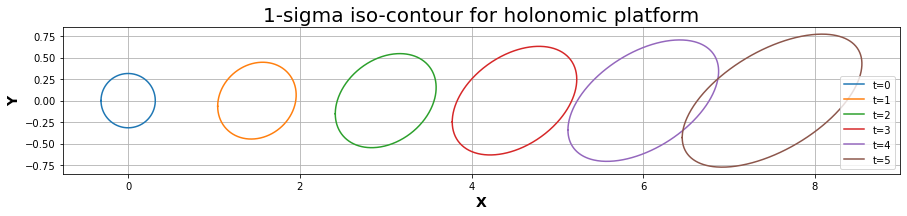

In [20]:
A = np.array([[1, 0.3], [0, 1]])
mu = np.array([0, 0])
cov = 0.1 * I

fig, ax = plt.subplots(figsize=(15, 15))
for i in range(0, t+1):
    
    plot2dcov(mu, cov, num_points=500, ax=ax, label='t={}'.format(i))

    mu = np.dot(A, mu) + np.dot(B, u)
    cov = np.dot(np.dot(A, cov), A.T) + R

ax.set_xlabel('X', fontsize=14, fontweight='bold')
ax.set_ylabel('Y', fontsize=14, fontweight='bold')
plt.title('1-sigma iso-contour for holonomic platform', fontsize=20)
plt.legend()
plt.grid()

### Task 3.D

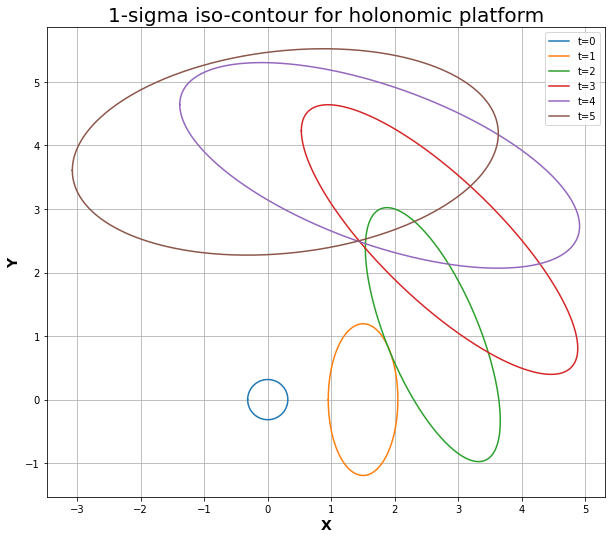

In [21]:
A = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1]])
u = np.array([3, 1.5])
R = np.array([[0.2, 0, 0],
              [0, 0.2, 0],
              [0, 0, 0.1]])
mu = np.array([0, 0, 0])
cov = np.array([[0.1, 0, 0],
                [0, 0.1, 0],
                [0, 0, 0.5]])

fig, ax = plt.subplots(figsize=(10, 10))
for i in range(0, t+1):
    
    plot2dcov(mu[:2], cov[:2, :2], num_points=500, ax=ax, label='t={}'.format(i))
    
    theta = mu[2]
    v = u[0]
    B = np.array([[dt*np.cos(theta), 0],
                  [dt*np.sin(theta), 0],
                  [0, dt]])
    G = np.array([[1, 0, -v*dt*np.sin(theta)],
                [0, 1, v*dt*np.cos(theta)],
                [0, 0, 1]])
    mu = np.dot(A, mu) + np.dot(B, u)
    cov = np.dot(np.dot(G, cov), G.T) + R

ax.set_xlabel('X', fontsize=14, fontweight='bold')
ax.set_ylabel('Y', fontsize=14, fontweight='bold')
plt.title('1-sigma iso-contour for holonomic platform', fontsize=20)
plt.legend()
plt.grid()

### Task 3.E

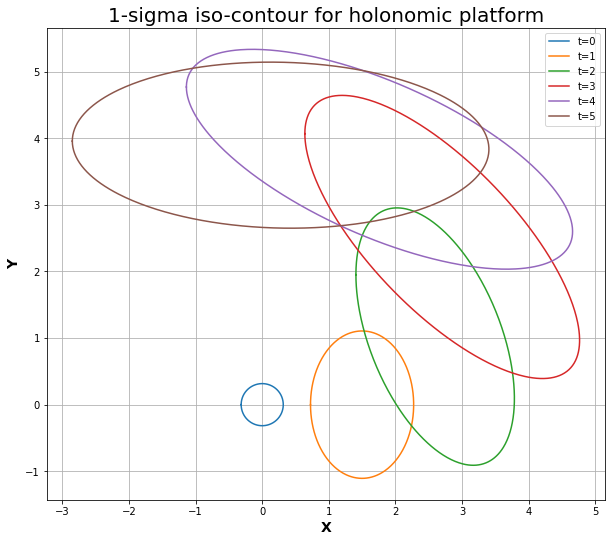

In [22]:
A = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1]])
u = np.array([3, 1.5])
R = np.array([[2, 0], [0, 0.1]])
mu = np.array([0, 0, 0])
cov = np.array([[0.1, 0, 0],
                [0, 0.1, 0],
                [0, 0, 0.5]])

fig, ax = plt.subplots(figsize=(10, 10))
for i in range(0, t+1):
    
    plot2dcov(mu[:2], cov[:2, :2], num_points=500, ax=ax, label='t={}'.format(i))
    
    theta = mu[2]
    v = u[0]
    B = np.array([[dt*np.cos(theta), 0],
                  [dt*np.sin(theta), 0],
                  [0, dt]])
    G = np.array([[1, 0, -v*dt*np.sin(theta)],
                [0, 1, v*dt*np.cos(theta)],
                [0, 0, 1]])
    mu = np.dot(A, mu) + np.dot(B, u)
    cov = np.dot(np.dot(G, cov), G.T) + np.dot(np.dot(B, R), B.T)
    
ax.set_xlabel('X', fontsize=14, fontweight='bold')
ax.set_ylabel('Y', fontsize=14, fontweight='bold')
plt.title('1-sigma iso-contour for holonomic platform', fontsize=20)
plt.legend()
plt.grid()

**comment**: We can see from both equations of the resultant means, both spaces have the same expected values of centers because $\eta \sim \mathcal{N}(0, R)$, which means that the noise effect is neglected when we come to the mean in both cases.<br/>However, this noise affects the covariance in a different manner according to its modelling. While representing in state space, its covariance matrix $R$ is just added individually to the total covariance.<br/>On the other hand, while going with the action space, it's embedded in the control vector $u$, which leaves it combining with the non-linear matrix $B$ and both have a contribution in the resultant covariance. So, we can see in the $2^{nd}$ plot that it has bigger and more deviated ellipses, which means that the motion has a higher degree of nondeterministic behavior in all three factors: movement coordinates ($X$, $Y$), and the orientation angle $\theta$. 